In [99]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from torchvision import transforms
from tifffile import imread
import numpy as np

# Load your .tif image with tifffile's imread function
numpy_image = imread(r'C:\EpochProjects\CTImageQuality\LDCTIQAG2023_train\image\0018.tif')

numpy_image_normalized = (numpy_image - np.min(numpy_image)) / (np.max(numpy_image) - np.min(numpy_image))

# Convert numpy image to PIL image for visualization and processing
# This assumes the image is in grayscale. If it's not, you may need to adjust this.
image = Image.fromarray((numpy_image_normalized * 255).astype('uint8'), 'L')



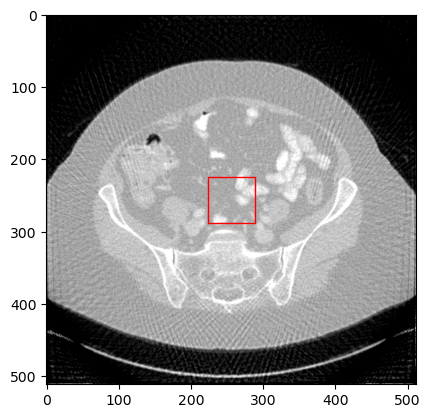

In [103]:
crop_size = 64
# Define center crop
center_crop = transforms.RandomCrop(crop_size)

# Create a figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image, cmap='gray')  # Use appropriate colormap for your image

# Create a Rectangle patch indicating the cropping area
 # Replace 224 with your crop size
start_x = (image.width - crop_size) // 2
start_y = (image.height - crop_size) // 2

rect = patches.Rectangle((start_x, start_y), crop_size, crop_size,
                         linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
ax.add_patch(rect)

plt.show()

# Perform center crop
cropped_image = center_crop(image)


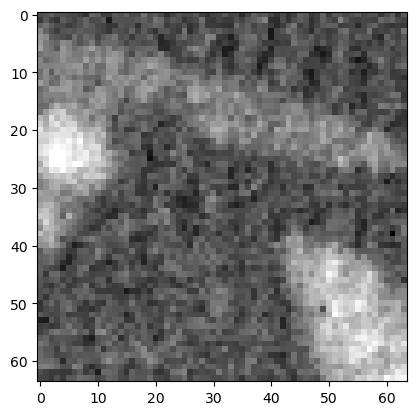

In [104]:
fig, ax = plt.subplots(1)
ax.imshow(cropped_image, cmap='gray')
plt.show()

In [92]:
from sklearn.utils import shuffle
import torchvision.transforms.functional as TF

def split_shuffle_image(image, num_parts=2):
    # Convert PIL Image to numpy array
    image_np = np.array(image)
    print(image_np.shape[0])
    print(image_np.shape[1])
    # Check that the image can be evenly divided into num_parts x num_parts
    assert image_np.shape[0] % num_parts == 0, "Image size must be evenly divisible by num_parts"
    assert image_np.shape[1] % num_parts == 0, "Image size must be evenly divisible by num_parts"

    # Split the image into patches
    patch_height = image_np.shape[0] // num_parts
    patch_width = image_np.shape[1] // num_parts
    patches = [image_np[i:i+patch_height, j:j+patch_width] for i in range(0, image_np.shape[0], patch_height) for j in range(0, image_np.shape[1], patch_width)]

    # Shuffle the patches
    patches = shuffle(patches)

    # Stitch the patches back together
    shuffled_image = np.block([[patches[num_parts * i + j] for j in range(num_parts)] for i in range(num_parts)])

    # Convert numpy array back to PIL Image
    shuffled_image = Image.fromarray(shuffled_image)

    return shuffled_image

In [97]:
new_image = split_shuffle_image(modified_image, num_parts=2)

512
512


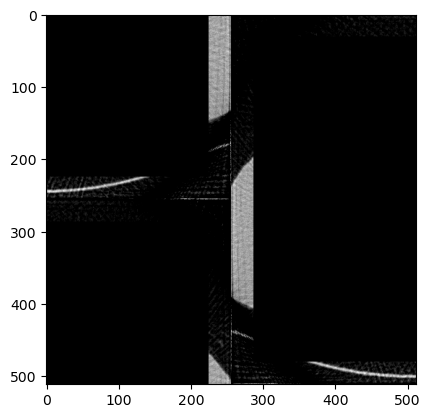

In [98]:
fig, ax = plt.subplots(1)
ax.imshow(new_image, cmap='gray')
plt.show()

In [80]:
import torchvision

shuf = torchvision.transforms.Lambda(lambda img: split_shuffle_image(img, num_parts=4))
img = shuf(cropped_image)

img

450
450


AssertionError: Image size must be evenly divisible by num_parts

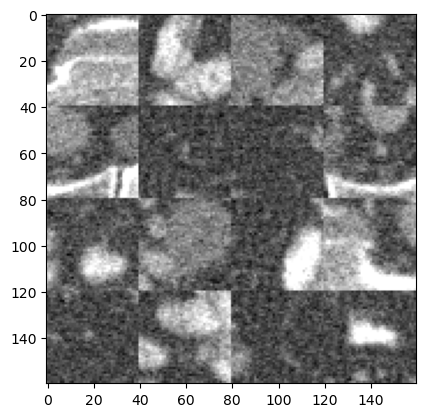

In [81]:
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
plt.show()

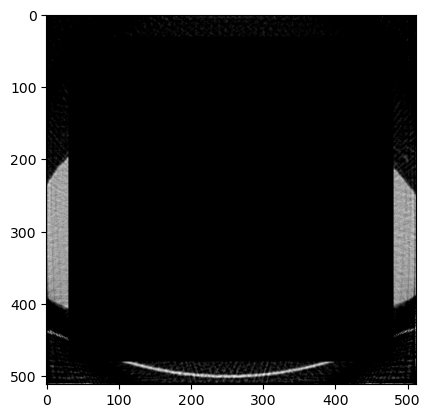

In [96]:
numpy_cropped_image = np.array(cropped_image)

# Create a copy of the original image
image_copy = np.array(image)

# Cut out the cropped region from the original image
image_copy[start_y:start_y + crop_size, start_x:start_x + crop_size] = 0

# Convert the modified image back to PIL image for visualization
modified_image = Image.fromarray(image_copy, 'L')

# Display the modified image with the cropped region cut out
fig, ax = plt.subplots(1)
ax.imshow(modified_image, cmap='gray')  # Use appropriate colormap for your image
plt.show()
